# Example notebook for the ATOM pipeline
---------------------------------

Load the data with one of the three imported datasets before running the
ATOM function. These datasets are provided by sklearn and are very small
and easy to learn. You can learn more about these datasets
at https://scikit-learn.org/stable/datasets/index.html.

    load_breast_cancer: binary classification
    load_wine: multi-class classification
    load_boston: regression

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from atom import ATOM

# Load the dataset's fetatures and targets as arrays
X, Y = load_breast_cancer(return_X_y=True)

## Run ATOM pipeline

In [2]:
# Call ATOM class for ML task exploration
atom = ATOM(X, Y, verbose=1)

# Fit the pipeline with the selected models
atom.fit(models=['LDA','RF', 'LGBM', 'lSVM'],
         metric='accuracy',
         max_iter=7,
         init_points=1,
         cv=3,
         bagging=10)

<<=============== ATOM ===============>>
Algorithm task: binary classification.

Running pipeline =================>
Models in pipeline: ['LDA', 'RF', 'LGBM', 'lSVM']


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:42<00:00, 10.75s/it]




Final stats ================>>
Duration: 00h:00m:43s
Target metric: Accuracy
--------------------------------
Linear Discriminant Analysis --> 0.973 ± 0.009
Random Forest                --> 0.944 ± 0.009
Light GBM                    --> 0.960 ± 0.008
Linear SVM                   --> 0.976 ± 0.007 !!


## Analyze results

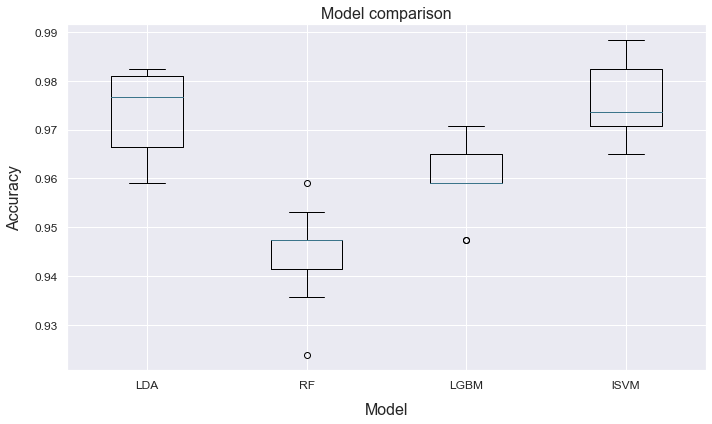

In [3]:
atom.boxplot()

### Deep-dive into the random forest model

In [4]:
# Get the results on some other metrics
print('Random forest precision on test set: ', atom.rf.Precision())
print('Random forest F1 on test set: ', atom.rf.F1())

Random forest precision on test set:  0.9805825242718447
Random forest F1 on test set:  0.9619047619047619


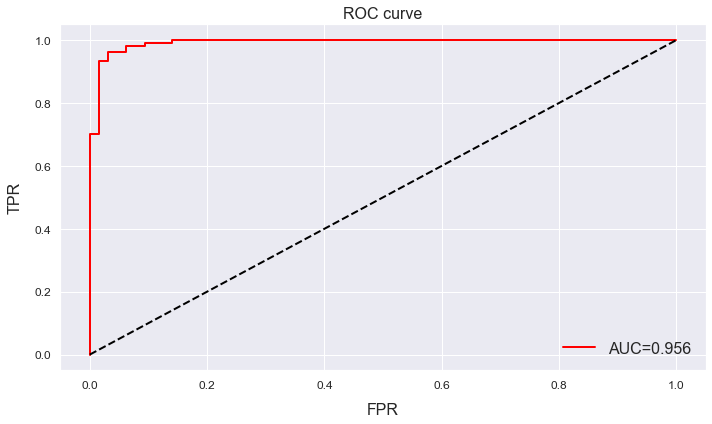

In [5]:
# Show the ROC plot
atom.rf.plot_ROC()

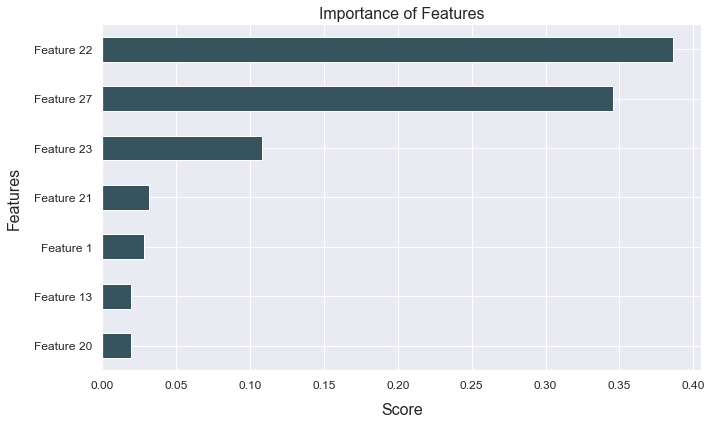

In [6]:
# Let's have a look at the feature importances
atom.rf.plot_feature_importance(show=7, figsize=(10,6))

### And what about the SVM?

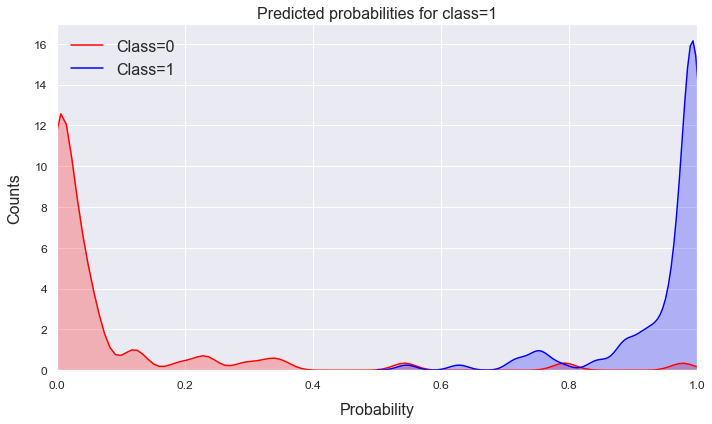

In [7]:
# Plot the probability distribution of having breast cancer
atom.lsvm.plot_probabilities()

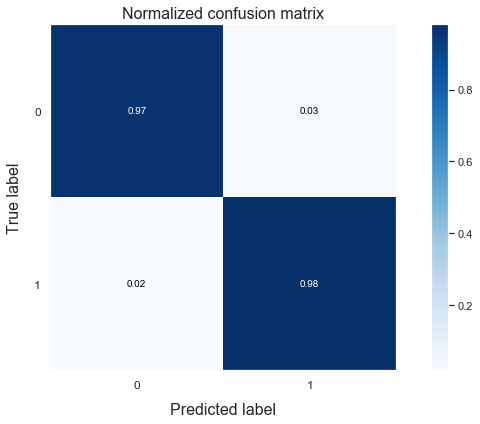

In [8]:
# Let's save the model for production and have a look at the final confusion matrix
atom.lsvm.save('SVM_final')
atom.lsvm.plot_confusion_matrix(filename='svm_confusion_matrix')